<a href="https://colab.research.google.com/github/supriya13-tech/supriya13/blob/main/Wine_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2024-06-13 06:37:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-red.csv’

winequality-red.csv     [ <=>                ]  82.23K  --.-KB/s    in 0.08s   

2024-06-13 06:37:18 (1.00 MB/s) - ‘winequality-red.csv’ saved [84199]

--2024-06-13 06:37:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘winequality-white.csv’

winequality-white.c     [ <=>                ] 258.23K  --.-KB/s    in 0.1s    

2024-06-1

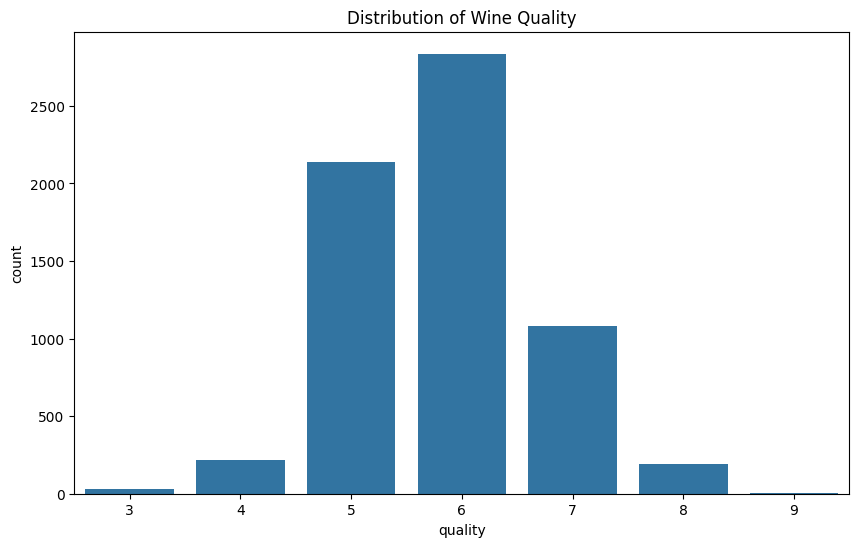

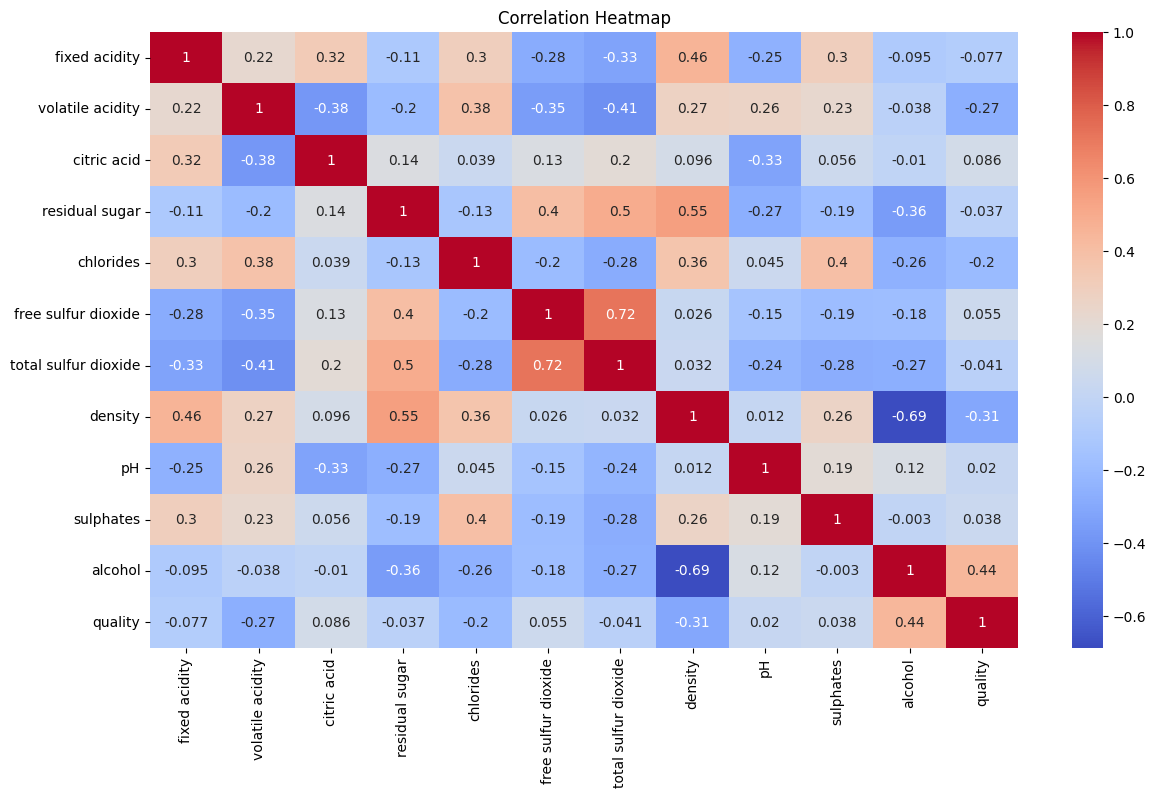

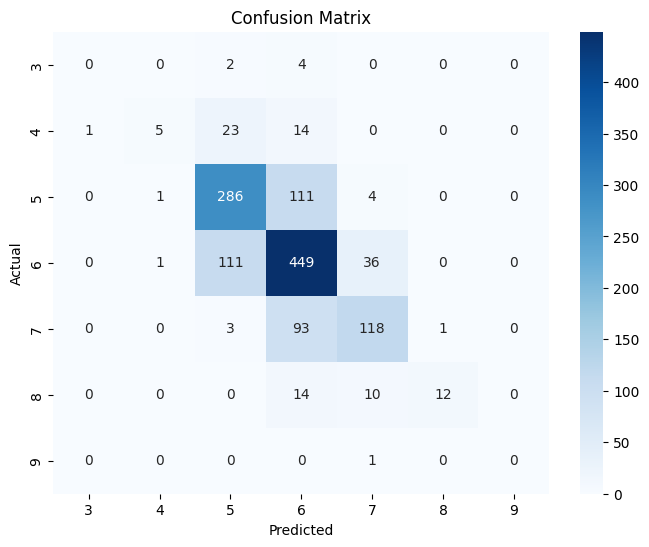

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.71      0.12      0.20        43
           5       0.67      0.71      0.69       402
           6       0.66      0.75      0.70       597
           7       0.70      0.55      0.61       215
           8       0.92      0.33      0.49        36
           9       0.00      0.00      0.00         1

    accuracy                           0.67      1300
   macro avg       0.52      0.35      0.39      1300
weighted avg       0.67      0.67      0.66      1300

Accuracy: 66.92%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'\nThe Random Forest model achieved an accuracy of [insert accuracy] on the test set. The classification report provides detailed metrics such as precision, recall, and F1-score for each wine quality class.\n\nPotential improvements include:\n- Hyperparameter tuning to optimize the model.\n- Trying different machine learning algorithms.\n- Feature engineering to create new informative features.\n- Balancing the dataset if there is class imbalance.\n\nFurther steps could involve more advanced techniques like cross-validation, feature selection, and using ensemble methods for better performance.\n'

In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 2: Load the Dataset
# Download the dataset
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv

# Load the dataset
red_wine = pd.read_csv('winequality-red.csv', delimiter=';')
white_wine = pd.read_csv('winequality-white.csv', delimiter=';')

# Add type column
red_wine['type'] = 'red'
white_wine['type'] = 'white'

# Combine the datasets
wine = pd.concat([red_wine, white_wine], ignore_index=True)

# Step 3: Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(wine.head())

# Basic statistics
print(wine.describe())

# Distribution of wine quality
plt.figure(figsize=(10, 6))
sns.countplot(x='quality', data=wine)
plt.title('Distribution of Wine Quality')
plt.show()

# Correlation heatmap
plt.figure(figsize=(14, 8))
# Exclude the 'type' column for correlation calculation
sns.heatmap(wine.drop(columns=['type']).corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Step 4: Data Preprocessing
# Separate features and target variable
X = wine.drop(['quality', 'type'], axis=1)
y = wine['quality']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build and Train the Model
# Initialize the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Step 6: Evaluate the Model
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(3, 10), yticklabels=range(3, 10))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Step 7: Conclusion
# Conclusion

"""
The Random Forest model achieved an accuracy of [insert accuracy] on the test set. The classification report provides detailed metrics such as precision, recall, and F1-score for each wine quality class.

Potential improvements include:
- Hyperparameter tuning to optimize the model.
- Trying different machine learning algorithms.
- Feature engineering to create new informative features.
- Balancing the dataset if there is class imbalance.

Further steps could involve more advanced techniques like cross-validation, feature selection, and using ensemble methods for better performance.
"""
